<a href="https://colab.research.google.com/github/Mayu-infinite/Practice/blob/main/KNN_IML_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Iris Classification

TABLE OF CONTENTS

1. load the Iris dataset using Scikit-learn.
2. Perform train-test split and feature scaling on the dataset.
3. Train a KNN classifier on the training data.
4. Predict on the test set using the trained model.
5. Evaluate the model using accuracy, confusion matrix, and classification report.
6. Plot the ROC curve and calculate AUC.
7. Experiment with different values of K and observe the effect on model performance.
8. Perform k-fold cross-validation on the KNN model and compare the results with the basic train-test split.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Set visualization styles
sns.set(style="whitegrid")

# Load the Iris dataset

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y
df['species'] = df['species'].map({i: name for i, name in enumerate(iris.target_names)})
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Display basic information and statistics

In [ ]:
# Display basic information and statistics
print(df.info())
print(df.describe())
print(df['species'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000      

#Perform EDA

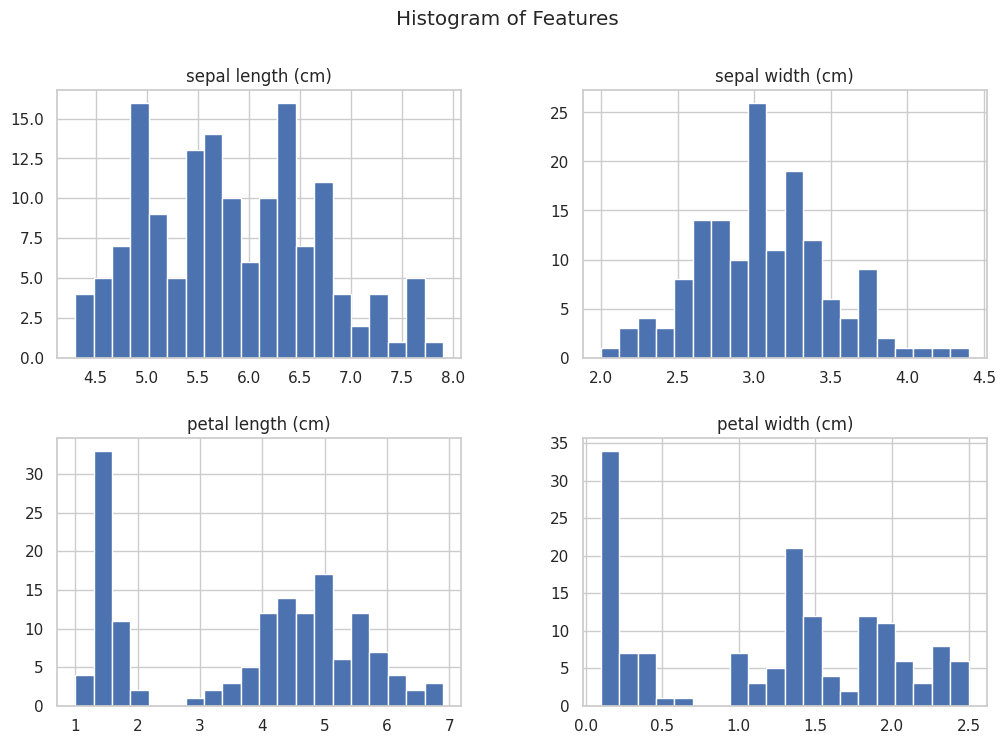

In [ ]:
# Plot histograms of each feature
df[iris.feature_names].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histogram of Features')
plt.show()

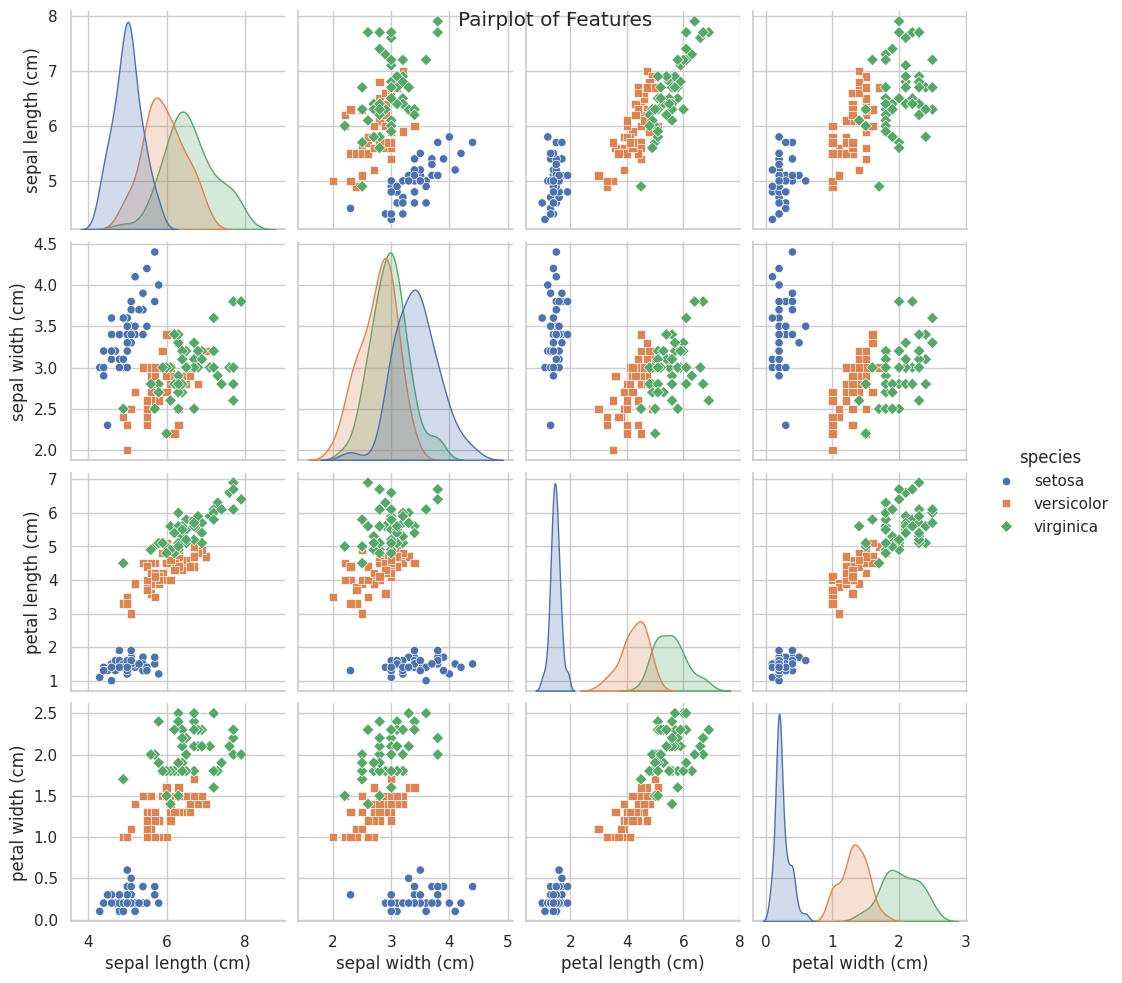

In [ ]:
# Plot pairplot for feature visualization
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Features')
plt.show()

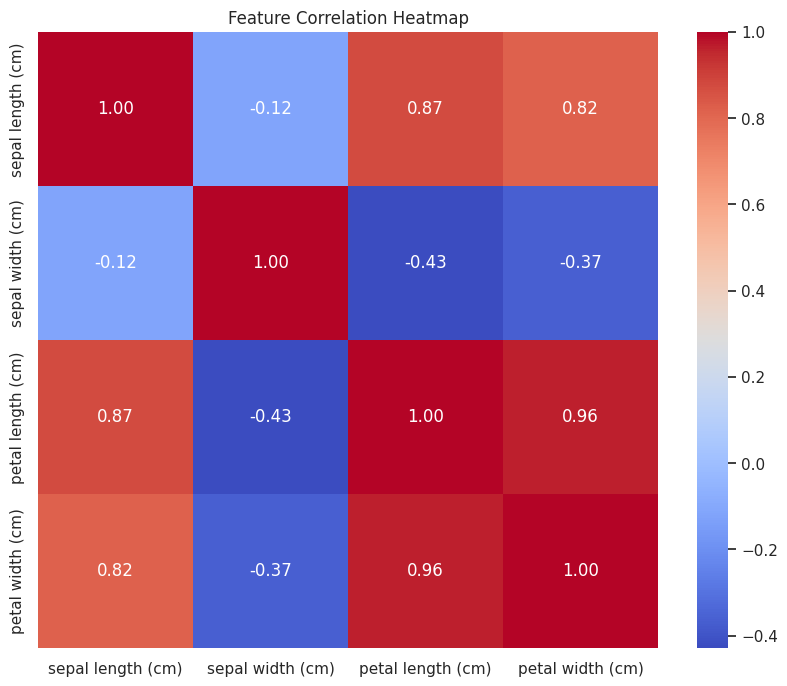

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[iris.feature_names].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Perform Train-Test Split and Feature Scaling

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Train a k-NN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the k-NN classifier
k = 5  # You can choose different values for k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier()

#Predict on the Test Set Using the Trained Model

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

#Evaluate the Model

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:


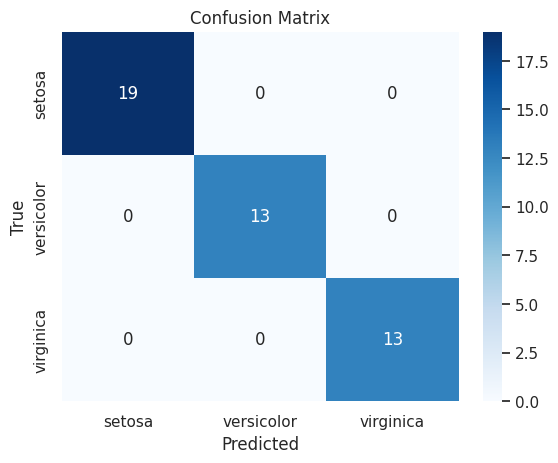

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#Plot the ROC Curve and Calculate AUC

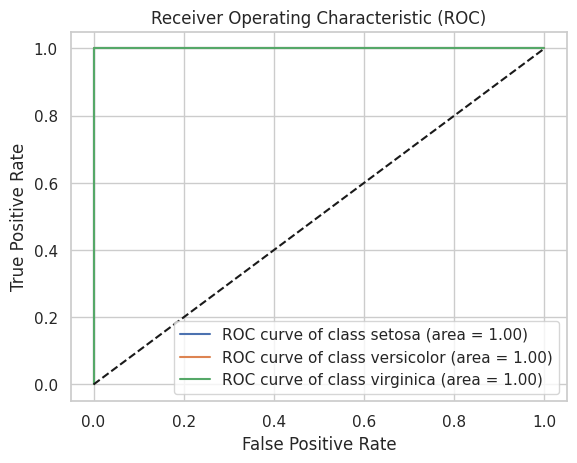

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output labels
y_bin = label_binarize(y, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities
y_prob = knn.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {iris.target_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='best')
plt.show()


# Experiment with different values of k

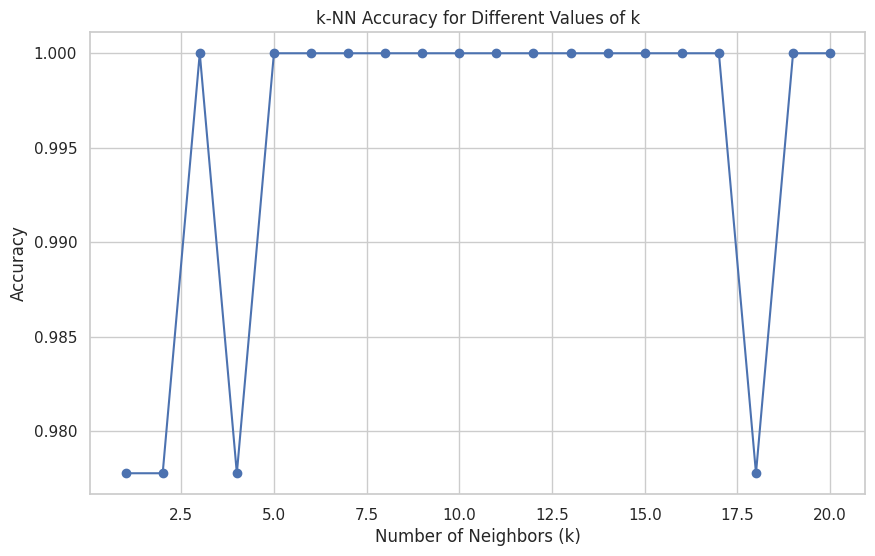

In [ ]:
# Experiment with different values of k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy for Different Values of k')
plt.grid(True)
plt.show()


#Perform k-Fold Cross-Validation and Compare Results

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=kf)

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean():.2f}')
print(f'Standard Deviation of Cross-Validation Scores: {cv_scores.std():.2f}')


Cross-Validation Scores: [1.         0.96666667 0.9        0.96666667 0.96666667]
Mean Cross-Validation Score: 0.96
Standard Deviation of Cross-Validation Scores: 0.03


#Hostogram Comparision

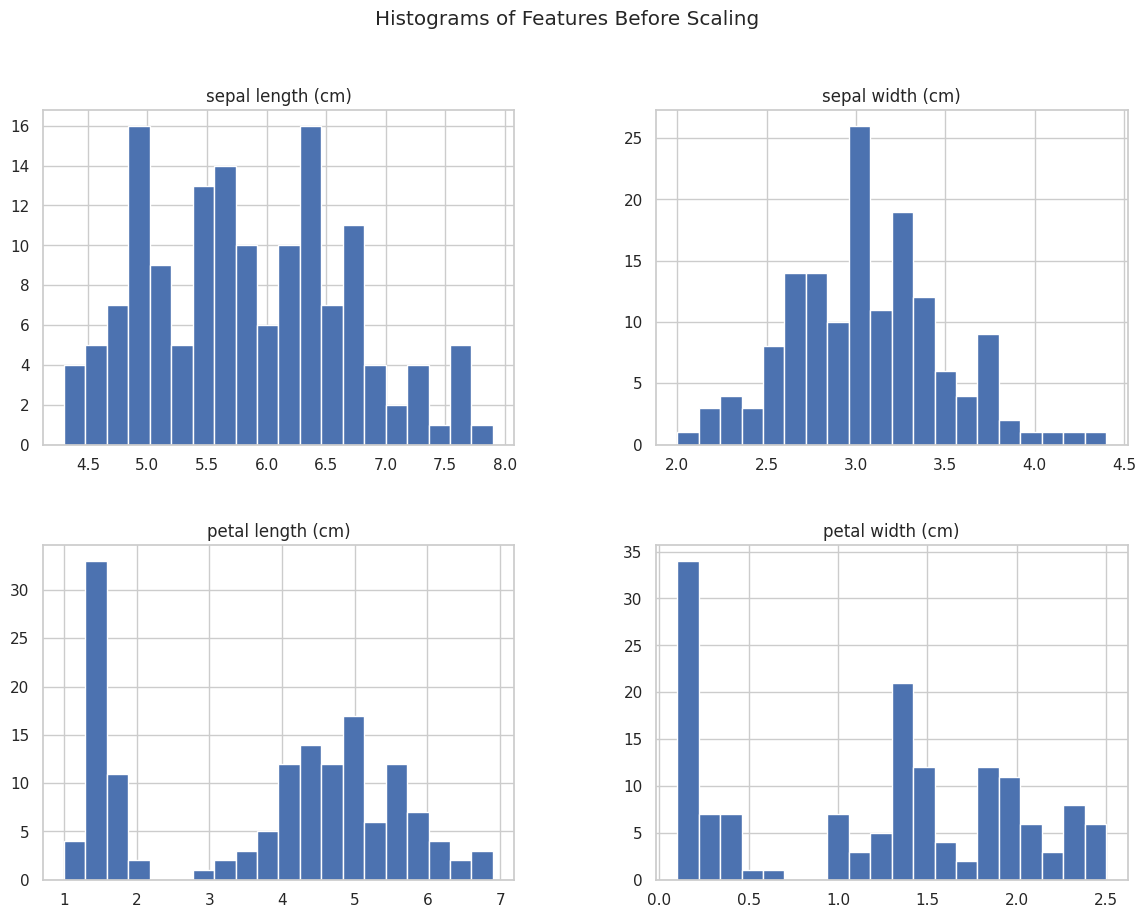

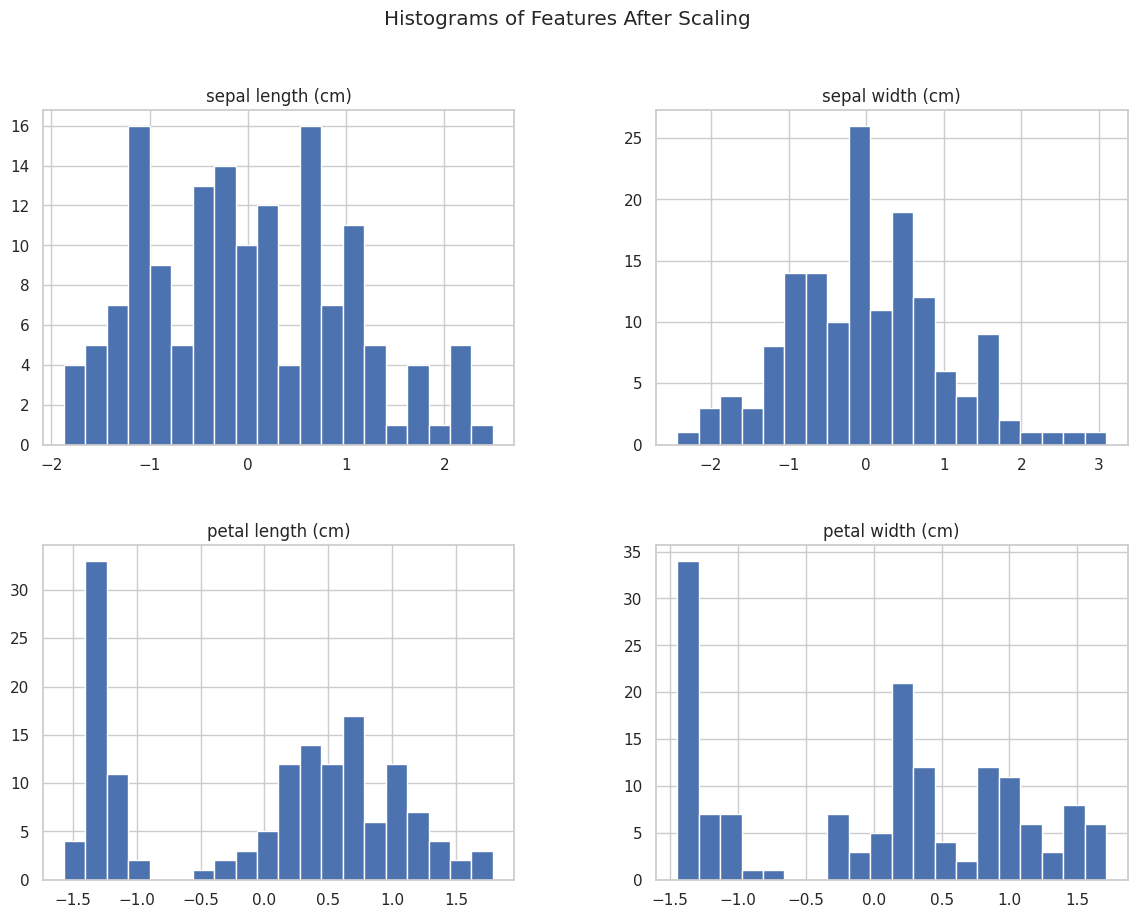

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Set visualization styles
sns.set(style="whitegrid")

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data=X, columns=feature_names)
df['species'] = y
df['species'] = df['species'].map({i: name for i, name in enumerate(iris.target_names)})

# Plot histograms of each feature before scaling
df[feature_names].hist(bins=20, figsize=(14, 10))
plt.suptitle('Histograms of Features Before Scaling')
plt.show()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data to DataFrame for visualization
df_scaled = pd.DataFrame(data=X_scaled, columns=feature_names)
df_scaled['species'] = y
df_scaled['species'] = df_scaled['species'].map({i: name for i, name in enumerate(iris.target_names)})

# Plot histograms of each feature after scaling
df_scaled[feature_names].hist(bins=20, figsize=(14, 10))
plt.suptitle('Histograms of Features After Scaling')
plt.show()
